# Describe the issue:
When a new product is to be listed on wish.com, we can estimate the likelihood that people will like it without actually placing it there. We were provided a dataset gathered from wise.com and instructed to create machine learning models in order to be able to predict the rating of a specific product.additionally, we can predict when a product will receive a high rating on wise.com thanks to the interpretability of machine learning.


What's the input?

Two files were sent to us: one for testing and one for training.The features that we discussed above are contained in the two files:
. price the price of the piece.
. retail price the retails price.
. units sold the number of sold pieces.
. uses ads boosts if the merchant you ads.
. rating count the number of rating for this product.
. badges count the number of badges the product and merchant have.
. badge product quality a badge which is given for the good products.
. badge fast shipping indicating that the merchent fast ship the pieces.
. product color the color of the product.
. product variation size the size of the piece.[medium ,large,small,..].
. product variation inverntory the variation in the inverntory.
. shipping option price
. has urgency bannerif there is a urgency text for the product [limited edition - sale ....].
. origin country the country of the manufacturer.
. merchant rating count the number of rating the merchant has on wise.
. merchant rating the rating of the merchant.
. merchant has profile picturethe flag indicating the availability of merchant picture.
. merchant profile picture link of the picture.


what is the output?

In this work, which involved supervising a machine learning classification task, we were required to forecast the product's rating as a number, ranging from 1 to 5.
features an urgency banner in the event that the product has an urgency text (limited edition - sale, etc.).
origin nation, the nation where the product is made.


What is the data mining function?

We are using data mining's classification functionality to solve this challenge.
Nonetheless, I first went through the machine learning process, which is as follows:

Data cleaning includes managing null values, removing columns that have a constant value, and handling inconsistent columns.
information To address the skewness of some columns in the numerical preprocessing, I used a conventional scaler and a log transform 
arranging Define the task as a classification problem, choose an evaluation measure, and then test various models with various features and hyperparameters.


What could be the challenges?

The dataset had numerous inconsistent columns, including those for the merchant subtitle information, product variation size id, color, and tags. It was highly biased and misformatted, so I began by determining whether there were any duplicates in the data, dealing with the inconsistent data entry, performing a variety of feature selection techniques, and experimenting with different models to determine which one would work best for our situation.then makes it even better.

What is the impact?

It's very difficult to collect data for some products for business purposes because we can't force the end user to rate if he doesn't want to. Therefore, we try to list only those products that will have high rates, which will help both the merchant and the customer sell their products. Additionally, by predicting the product's rate before listing it on the platform, this will help the companies determine whether the product will be accepted by the customers.


What is an ideal solution?

possessing an infinite number of records, which will enable us to create the best model without worrying about overfitting. We also have other models that operate by grouping customers based on their interests so they can only view products that align with their interests, improving the customer's experience on the platform and helping merchants boost sales. And because we lack all of that, I attempted to create a model using the dataset provided, which yields a f1-score of roughly 0.76 We still need to collect more information and revisit this issue in order to improve the model and try to outperform it.


In [292]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/competition/test_new.csv
/kaggle/input/competition/train_new.csv


In [293]:
#import libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, f1_score

In [379]:
#read the  training data
df=pd.read_csv("/kaggle/input/competition/train_new.csv")
df

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,8.00,7,EUR,10000,1,4.0,1670,0,0,0,...,keepahorse,"88 % avis positifs (66,644 notes)",66644,4.137582,577fb2b368116418674befd9,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,272
1,8.00,7,EUR,1000,0,4.0,843,1,1,0,...,上海铭启电气科技有限公司,"91 % avis positifs (25,752 notes)",25752,4.256873,566a3ef17233ff2686443082,0,NaN,summer,2020-08,1515
2,6.00,34,EUR,100,0,4.0,10,0,0,0,...,zhaodongmei,"83 % avis positifs (3,897 notes)",3897,3.928920,5aacd6c1ccf0c83e5a6f3de0,0,NaN,summer,2020-08,940
3,4.67,4,EUR,100,1,3.0,82,0,0,0,...,pookie0331,"87 % avis positifs (7,497 notes)",7497,4.079365,583141fbfef4094e51453d9b,0,NaN,summer,2020-08,309
4,8.00,11,EUR,1000,0,4.0,127,0,0,0,...,shitongyi12683626,91 % avis positifs (173 notes),173,4.306358,5d3bc9f8e13a7e654424a4cb,0,NaN,summer,2020-08,226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,4.00,4,EUR,10000,0,4.0,2150,0,0,0,...,fantastic_tune,"92 % avis positifs (230,951 notes)",230951,4.311066,53f2db3c104dae6bcae0c271,0,NaN,summer,2020-08,1381
1090,5.00,5,EUR,1000,0,5.0,377,1,0,1,...,zzbllss,"(2,904 notes)",2904,4.422521,592968ba63950d682ca4b195,0,NaN,summer,2020-08,212
1091,9.00,48,EUR,1000,1,4.0,135,0,0,0,...,oiug56465,"78 % avis positifs (6,632 notes)",6632,3.748794,5b6ec2f2838d931d2fbf7a28,0,NaN,summer,2020-08,163
1092,11.00,10,EUR,10000,1,4.0,1479,0,0,0,...,yubenqiang,"83 % avis positifs (5,816 notes)",5816,3.936382,58330d7def56284f7634e5e5,0,NaN,summer,2020-08,674


In [380]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1094 non-null   float64
 1   retail_price                  1094 non-null   int64  
 2   currency_buyer                1094 non-null   object 
 3   units_sold                    1094 non-null   int64  
 4   uses_ad_boosts                1094 non-null   int64  
 5   rating                        1094 non-null   float64
 6   rating_count                  1094 non-null   int64  
 7   badges_count                  1094 non-null   int64  
 8   badge_local_product           1094 non-null   int64  
 9   badge_product_quality         1094 non-null   int64  
 10  badge_fast_shipping           1094 non-null   int64  
 11  tags                          1094 non-null   object 
 12  product_color                 1065 non-null   object 
 13  pro

**As** we see we have 33 features and one label which we need to train on, at frist glance we need to drop some columns which can not affect the target 

In [381]:
# sum of null values in each column
df.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating                            0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    29
product_variation_size_id        12
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              745
urgency_text                    745
origin_country                   12
merchant_title                    0
merchant_name                     4
merchant_info_subtitle            0
merchant_rating_count             0
merchant_rating             


**We have null values present in certain columns of our dataset, and it is necessary to address them effectively.**

fristly we have  number of null values in some columns like product_color','product_variation_size_id','origin_country','merchant_name','merchant_profile_picture','merchant_info_subtitle','merchant_has_profile_picture','urgency_text' So we need to drop them

In [382]:
df.drop(columns=['product_color','product_variation_size_id','origin_country','merchant_name','merchant_profile_picture','merchant_info_subtitle','merchant_has_profile_picture','urgency_text'], inplace=True)


In [331]:
df.isna().sum()

price                            0
retail_price                     0
currency_buyer                   0
units_sold                       0
uses_ad_boosts                   0
rating                           0
rating_count                     0
badges_count                     0
badge_local_product              0
badge_product_quality            0
badge_fast_shipping              0
tags                             0
product_variation_inventory      0
shipping_option_name             0
shipping_option_price            0
shipping_is_express              0
countries_shipped_to             0
inventory_total                  0
has_urgency_banner             745
merchant_title                   0
merchant_rating_count            0
merchant_rating                  0
merchant_id                      0
theme                            0
crawl_month                      0
id                               0
dtype: int64

On the other hand, we are encountering a large number of null values in some columns. Therefore, let's explore strategies for handling them

In [332]:
# unique values in has urgency banner column
df['has_urgency_banner'].unique()

array([nan,  1.])

we have 2 values nan and 1 So i decide to fill the nulls with 0

In [333]:
df['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [334]:
df.isna().sum()

price                          0
retail_price                   0
currency_buyer                 0
units_sold                     0
uses_ad_boosts                 0
rating                         0
rating_count                   0
badges_count                   0
badge_local_product            0
badge_product_quality          0
badge_fast_shipping            0
tags                           0
product_variation_inventory    0
shipping_option_name           0
shipping_option_price          0
shipping_is_express            0
countries_shipped_to           0
inventory_total                0
has_urgency_banner             0
merchant_title                 0
merchant_rating_count          0
merchant_rating                0
merchant_id                    0
theme                          0
crawl_month                    0
id                             0
dtype: int64

**Great news!** 🎉 Thanks to my efforts, i've successfully handled all the null values in our dataset. Now, we can proceed with our analysis without any missing data holding us back. Let's continue exploring and drawing insights from our clean dataset! 💃💃

In [335]:
#let's see the duplicated values
df.duplicated().sum()

0

In [336]:
# statistical description of our data 
df.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,id
count,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1094.000000,1.094000e+03,1094.000000,1094.000000
mean,8.320786,23.712066,4518.661792,0.432358,4.006399,915.523766,0.114260,0.019196,0.083181,0.011883,32.807130,2.344607,0.002742,40.484461,49.849177,0.319013,2.678399e+04,4.036191,772.207495
std,4.027448,31.802661,9825.608568,0.495630,0.585706,2037.561158,0.348461,0.137275,0.276282,0.108409,21.454655,1.044781,0.052318,20.196229,2.480687,0.466307,8.616171e+04,0.200397,453.784430
min,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,8.000000,1.000000,0.000000,4.000000e+00,2.941176,2.000000
25%,5.830000,7.000000,100.000000,0.000000,4.000000,24.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,0.000000,1.926000e+03,3.918464,382.250000
50%,8.000000,10.000000,1000.000000,0.000000,4.000000,143.500000,0.000000,0.000000,0.000000,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,0.000000,8.225000e+03,4.045170,752.500000
75%,11.000000,26.000000,5000.000000,1.000000,4.000000,845.500000,0.000000,0.000000,0.000000,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.000000,2.306200e+04,4.166826,1166.500000
max,49.000000,252.000000,100000.000000,1.000000,6.000000,20744.000000,3.000000,1.000000,1.000000,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.000000,2.174765e+06,4.577519,1572.000000


In [337]:
# unique values in rating column
df['rating'].unique()

array([4., 3., 5., 2., 1., 6.])

In [338]:
df["rating"].value_counts()

rating
4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
6.0      1
Name: count, dtype: int64

<Axes: xlabel='rating'>

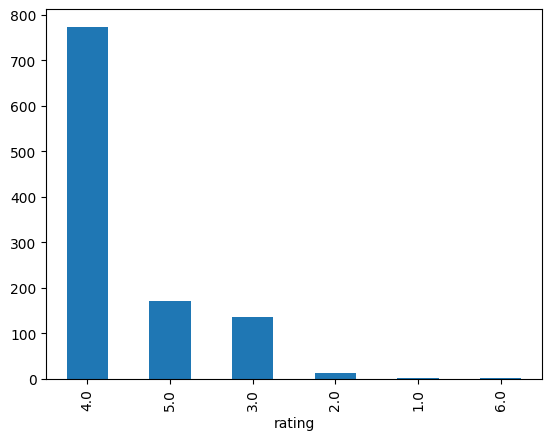

In [339]:
#ploting the value counts of rating column
df["rating"].value_counts().plot(kind='bar')

The ratings in our dataset mostly fall within the range of 3.0, 4.0, and 5.0. However, we expect ratings to span from 1.0 to 5.0, as stated in the competition overview. To address this, we need to gather more data to ensure a wider representation of ratings across the entire spectrum.  

In [383]:
#we need to drop the value of ratting which equle to 6
d = df[df['rating'] == 6.0]
df.drop(d.index, inplace=True)
df['rating'].value_counts()

rating
4.0    774
5.0    170
3.0    135
2.0     12
1.0      2
Name: count, dtype: int64

In [343]:
df['rating'].unique()

array([4., 3., 5., 2., 1.])

In [344]:
#the unique values of price column
df['price'].unique()

array([ 8.  ,  6.  ,  4.67, 14.  ,  3.67,  9.  , 19.  , 12.  ,  5.74,
       13.  , 11.  , 18.  ,  5.  ,  2.  , 15.  ,  3.  ,  5.91,  1.72,
        7.  ,  3.81, 16.  ,  1.74,  5.83,  5.79,  1.66,  5.65,  5.87,
        4.68,  5.9 ,  4.81,  1.77,  5.66, 22.  ,  4.66,  3.73,  3.91,
        5.73,  3.94,  3.69,  1.86,  1.88,  2.83,  4.93,  2.81,  5.84,
        3.7 ,  3.71, 17.  ,  1.  ,  5.81,  4.84,  4.  ,  5.95,  5.77,
        4.83,  3.83,  1.7 ,  3.86,  1.76,  5.86,  5.85,  3.88,  5.69,
        5.72,  1.89,  4.9 ,  2.71,  3.72,  5.75,  3.92,  3.66,  2.67,
        5.71,  5.8 ,  3.93,  3.68,  2.76,  5.82,  3.85, 25.  ,  5.7 ,
        3.76,  3.9 ,  2.72,  4.69, 27.  ,  5.67,  2.89,  4.86,  4.94,
        1.84,  2.66,  4.74,  3.74,  1.75,  5.78,  2.9 ,  5.88,  5.68,
        3.87,  1.91, 23.  ,  2.65,  3.65,  5.89,  1.68,  4.65,  1.85,
       26.  , 20.  , 24.  ,  5.92,  2.8 ,  2.69,  1.8 ,  4.73])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='price', ylabel='Count'>

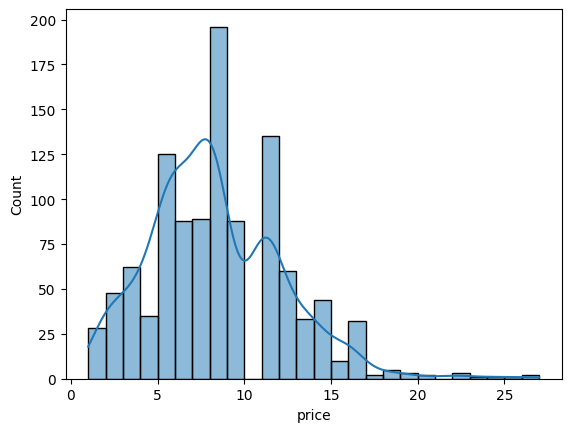

In [345]:
import seaborn as sns

# Plot histogram for a price column
sns.histplot(data=df, x='price', kde=True)

We have some outlires in price column

In [346]:
#unique values of retail price
df['retail_price'].unique()

array([  7,  34,   4,  11,  51,   9,   8,  21,   5,  10,  16,  15,   6,
        38,   2,  13,   3,  87,  17,  26,  59, 152,  43, 115,  25,  56,
       107,  31,  42,  50,  68,  70,  60,  22,  75,  76, 102,  20, 159,
        14,  19, 104,  72,  30, 169,  84,  27,  12,  85,  33, 106,  53,
        23,  54,  88,  58,  47,  67, 252,  37,  18,  48, 139,  65,  29,
        81, 118, 108,  49,  93, 110,  97, 168,  40,  36,  32, 140, 101,
       250,  41,  66, 135,  69,  55,  92, 122, 134, 127, 145,  24,  28,
       111,  89, 105,  57])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='retail_price', ylabel='Count'>

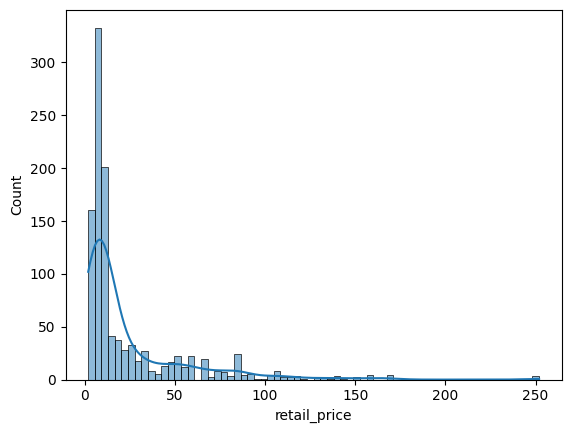

In [347]:
import seaborn as sns

# Plot histogram for a retail price column
sns.histplot(data=df, x='retail_price', kde=True)

**we** can see that the retail price distribution is positively skewed with the appearance of some outliers which we need to deal with. we may need to transform this column using log transform.

In [348]:
column = df['retail_price']

# Calculate the first quartile (Q1)
Q1 = np.percentile(column, 25)

# Calculate the third quartile (Q3)
Q3 = np.percentile(column, 75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = column[(column < lower_bound) | (column > upper_bound)]

# Print the outliers
print("Outliers:", outliers)

Outliers: 21       87
30       59
34      152
43      115
46       56
       ... 
1010     72
1016    134
1036     68
1056     85
1066     59
Name: retail_price, Length: 148, dtype: int64


we have some outlires in retail price column

In [384]:
def retail_price_outlier(x):
    if x <= 1.94:
        return 2.0
    elif x>=108.00:
        return 108.00
    else:
        return x

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='retail_price', ylabel='Count'>

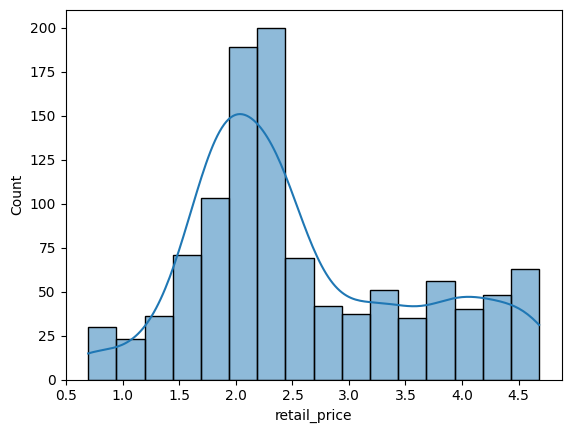

In [385]:
# first clip the outliers to certain value this transform the values using log transform
df['retail_price']=df['retail_price'].apply(retail_price_outlier)
df['retail_price']=np.log(df['retail_price'])
sns.histplot(data=df,x='retail_price',kde=True)

In [351]:
# unique values of currency buyer
df['currency_buyer'].unique()

array(['EUR'], dtype=object)

as we see the currency buyer column has only one value So let's drop it

In [386]:
# drop currency buyer column
df.drop(columns=['currency_buyer'],inplace=True)

In [387]:
df.columns

Index(['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping', 'tags',
       'product_variation_inventory', 'shipping_option_name',
       'shipping_option_price', 'shipping_is_express', 'countries_shipped_to',
       'inventory_total', 'has_urgency_banner', 'merchant_title',
       'merchant_rating_count', 'merchant_rating', 'merchant_id', 'theme',
       'crawl_month', 'id'],
      dtype='object')

In [ ]:
df['product_variation_size_id'].unique()

In [388]:
numical_columns = df[['price', 'retail_price', 'units_sold', 'uses_ad_boosts', 'rating',
       'rating_count', 'badges_count', 'badge_local_product',
       'badge_product_quality', 'badge_fast_shipping',
       'product_variation_inventory',
       'shipping_option_price', 'shipping_is_express',
       'countries_shipped_to', 'inventory_total', 'has_urgency_banner',
       'merchant_rating_count', 'merchant_rating']]

In [389]:
# Calculate correlation matrix
correlation_matrix = numical_columns.corr()

# Create a heatmap using Plotly Express
fig = px.imshow(correlation_matrix,
                labels=dict(color="Correlation"),
                x=correlation_matrix.index,
                y=correlation_matrix.columns,
                color_continuous_scale='burg',  
                title="Correlation Heatmap")

# Show the plot
fig.show()

# **modeling :
# Experiment 1**

As indicated by the heatmap, the columns 'price', 'shipping_option_price', 'merchant_rating_count', 'badges_count', and 'badge_product_quality' exhibit the strongest correlation with the target variable 'rating'. So, I've decided to use this columns as features (X) for the model.

In [354]:
# selected features
x = df[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality']]
y =df["rating"] # the target

In [390]:
x

,price,shipping_option_price,merchant_rating_count,badges_count,badge_product_quality
0,8.00,3,66644,0,0
1,8.00,3,25752,1,0
2,6.00,2,3897,0,0
3,4.67,1,7497,0,0
4,8.00,3,173,0,0
...,...,...,...,...,...
1089,4.00,1,230951,0,0
1090,5.00,2,2904,1,1
1091,9.00,3,6632,0,0
1092,11.00,2,5816,0,0


In [355]:
# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [356]:
# Instantiate the StandardScaler
scaler=StandardScaler()

In [357]:
# Fit the scaler to the training data and transform it
scaler.fit(X_train)

StandardScaler()

In [358]:
# Transform the validation data using the scaler fitted on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**decision tree**

In [427]:
from sklearn.model_selection import GridSearchCV
# Define the parameters grid
DT_param = DT_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(9, 100),}

# Instantiate the Decision Tree Classifier
model = DecisionTreeClassifier()

# Perform grid search with cross-validation
grid=GridSearchCV(model,param_grid=DT_param)

# Get the best estimator (model) and best parameters
grid.fit(X_train_scaled,y_train)
model=grid.best_estimator_
print(grid.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



{'criterion': 'entropy', 'max_depth': 9}


In [360]:
X_test_scaled

array([[-0.65931676, -0.34202633, -0.07199284, -0.32255087, -0.29735237],
       [-0.67241045, -0.34202633,  0.41089665, -0.32255087, -0.29735237],
       [-0.60432326, -0.34202633, -0.29282335, -0.32255087, -0.29735237],
       ...,
       [ 0.18129818,  0.64454466, -0.29324664, -0.32255087, -0.29735237],
       [-0.86619707, -0.34202633,  0.1678434 , -0.32255087, -0.29735237],
       [-0.60432326, -0.34202633, -0.25310815, -0.32255087, -0.29735237]])

In [361]:
# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
f1_scores_DTC=f1_score(y_test, y_pred,average='micro')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the F1 score
print('F1-Score is : ', f1_scores_DTC)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         4
         3.0       0.60      0.29      0.39        31
         4.0       0.75      0.95      0.84       146
         5.0       0.82      0.37      0.51        38

    accuracy                           0.74       219
   macro avg       0.54      0.40      0.43       219
weighted avg       0.73      0.74      0.70       219

F1-Score is :  0.7351598173515982


In [362]:
y_pred

array([4., 4., 4., 4., 5., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 2., 4., 4., 4., 4., 4., 4., 4., 5., 4., 3., 4., 4.,
       4., 4., 4., 4., 3., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 3., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 3., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4.,
       4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       3., 3., 4., 4., 4., 3., 3., 5., 2., 4., 2., 4., 4., 4., 3., 4., 4.,
       4., 5., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 3., 4., 4., 4., 4., 4., 4.,
       4., 3., 4., 4., 4., 4., 4., 4., 3., 3., 4., 4., 4., 4., 4., 5., 4.,
       4., 4., 4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4.])

In [392]:
#read test data
df2=pd.read_csv('/kaggle/input/competition/test_new.csv')

In [393]:
df2

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating_count,badges_count,badge_local_product,badge_product_quality,badge_fast_shipping,...,merchant_name,merchant_info_subtitle,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,theme,crawl_month,id
0,5.75,5,EUR,10,1,0,0,0,0,0,...,liyang163,33 % avis positifs (3 notes),3,2.333333,5e63469b2fdc774466e15dd5,0,NaN,summer,2020-08,937
1,7.00,7,EUR,5000,0,579,0,0,0,0,...,singingthesong,"86 % avis positifs (4,213 notes)",4213,4.058391,583547f417dc6224cb464117,0,NaN,summer,2020-08,270
2,5.00,16,EUR,1000,1,62,0,0,0,0,...,surperboutique,"85 % avis positifs (10,501 notes)",10501,4.029235,57086fd7fa6bee434d0e5852,0,NaN,summer,2020-08,308
3,18.00,27,EUR,5000,1,1903,0,0,0,0,...,postonny,"86 % avis positifs (15,855 notes)",15855,4.052917,5a17b55d1f4d8c4f0b44b0ce,0,NaN,summer,2020-08,913
4,12.00,81,EUR,20000,0,1799,0,0,0,0,...,guangzhouchanny,"88 % avis positifs (151,914 notes)",151914,4.127921,53aa664438d3046ee44a5024,0,NaN,summer,2020-08,403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,16.00,14,EUR,100,1,27,0,0,0,0,...,hernadezyeli,70 % avis positifs (572 notes),572,3.367133,5dc818ca030a154e48a3a8af,0,NaN,summer,2020-08,1166
475,6.00,17,EUR,5000,1,817,0,0,0,0,...,firstcrush,"87 % avis positifs (50,864 notes)",50864,4.079644,587f85cbb8038f4cb049c56c,1,https://s3-us-west-1.amazonaws.com/sweeper-pro...,summer,2020-08,1416
476,4.83,51,EUR,50,1,1,0,0,0,0,...,saulstore,85 % avis positifs (57 notes),57,3.824561,5e3c5fbfe217d492138970c1,0,NaN,summer,2020-08,63
477,3.00,3,EUR,100,1,8,0,0,0,0,...,hey1827,"87 % avis positifs (1,086 notes)",1086,4.056169,5c6d6c28619caa1d94891d06,0,NaN,summer,2020-08,626


In [365]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 479 entries, 0 to 478
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         479 non-null    float64
 1   retail_price                  479 non-null    int64  
 2   currency_buyer                479 non-null    object 
 3   units_sold                    479 non-null    int64  
 4   uses_ad_boosts                479 non-null    int64  
 5   rating_count                  479 non-null    int64  
 6   badges_count                  479 non-null    int64  
 7   badge_local_product           479 non-null    int64  
 8   badge_product_quality         479 non-null    int64  
 9   badge_fast_shipping           479 non-null    int64  
 10  tags                          479 non-null    object 
 11  product_color                 467 non-null    object 
 12  product_variation_size_id     477 non-null    object 
 13  produ

In [366]:
df2.isna().sum()

price                             0
retail_price                      0
currency_buyer                    0
units_sold                        0
uses_ad_boosts                    0
rating_count                      0
badges_count                      0
badge_local_product               0
badge_product_quality             0
badge_fast_shipping               0
tags                              0
product_color                    12
product_variation_size_id         2
product_variation_inventory       0
shipping_option_name              0
shipping_option_price             0
shipping_is_express               0
countries_shipped_to              0
inventory_total                   0
has_urgency_banner              355
urgency_text                    355
origin_country                    5
merchant_title                    0
merchant_name                     0
merchant_info_subtitle            1
merchant_rating_count             0
merchant_rating                   0
merchant_id                 

In [394]:
# Drop the columns from the test data that were dropped from the training data
df2.drop(columns=['product_color','product_variation_size_id','origin_country','merchant_name','merchant_profile_picture','merchant_info_subtitle','merchant_has_profile_picture','urgency_text'], inplace=True)

In [395]:
# Fill missing values in the 'has_urgency_banner' column with 0
df2['has_urgency_banner'] = df['has_urgency_banner'].fillna(0)

In [371]:
df2['has_urgency_banner'].unique()

array([0., 1.])

In [372]:
# sum of duplicated value
df2.duplicated().sum()

0

In [373]:
# Taking the same features as the training data
df_test = df2[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality']]

In [374]:
# Making predictions using the trained model
predictions=model.predict(df_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [375]:
# array of predictions
predictions

array([4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 4., 4.

In [377]:
## Creating a DataFrame with predictions and corresponding IDs
_id=df2['id']
# Saving the DataFrame to a CSV file without including the index
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': predictions})
pred_df.to_csv('submission.csv', index=False)

# **Second experiment**

**decision tree**  with different parms and different features

I'm opting to include additional numerical features in an attempt to improve the model's accuracy.

In [415]:
# selected features
x = df[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality','units_sold']]
y =df["rating"] # the target

In [416]:
# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=50)

In [417]:
# Fit the scaler to the training data and transform it
scaler.fit(X_train)

StandardScaler()

In [418]:
# Transform the validation data using the scaler fitted on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [428]:
from sklearn.model_selection import GridSearchCV
# Define the parameters grid
DT_param = { 'max_depth': range(5, 10)}

# Instantiate the Decision Tree Classifier
model = DecisionTreeClassifier( criterion='gini')

# Perform grid search with cross-validation
grid=GridSearchCV(model,param_grid=DT_param)

# Get the best estimator (model) and best parameters
grid.fit(X_train_scaled,y_train)
model=grid.best_estimator_
print(grid.best_params_)

{'max_depth': 5}


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning:

The least populated class in y has only 2 members, which is less than n_splits=5.



In [429]:
# Predict the labels for the test set
y_pred = model.predict(X_test_scaled)

# Calculate the F1 score
f1_scores_DTC=f1_score(y_test, y_pred,average='micro')

# Print the classification report
print(classification_report(y_test, y_pred))

# Print the F1 score
print('F1-Score is : ', f1_scores_DTC)

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         2
         3.0       0.75      0.06      0.11        50
         4.0       0.77      0.92      0.84       235
         5.0       0.44      0.44      0.44        41

    accuracy                           0.73       328
   macro avg       0.49      0.36      0.35       328
weighted avg       0.72      0.73      0.67       328

F1-Score is :  0.7256097560975608


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [434]:
df_test=df2[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality','units_sold']]

In [435]:
# Making predictions using the trained model
predictions=model.predict(df_test)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



In [436]:
# array of predictions
predictions

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 5., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 4., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3.

In [438]:
## Creating a DataFrame with predictions and corresponding IDs
_id=df2['id']
# Saving the DataFrame to a CSV file without including the index
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': predictions})
pred_df.to_csv('submission2.csv', index=False)

After experimenting with various parameters and different sets of features in the decision tree model to enhance accuracy, unfortunately, it did not yield significant improvement. Therefore, I'll explore alternative models to further improve performance.

# Experiment 3 :
# using naive bayes

In [446]:
# selected features
x = df[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality','units_sold']]
y =df["rating"] # the target
# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)


In [450]:
model2 = GaussianNB()
model2.fit(X_train,y_train)
y_pred = model.predict(X_test)
f1_scores_NB=f1_score(y_test, y_pred, average='micro')
print(classification_report(y_test, y_pred))
print('F1-Score is : ', f1_scores_NB)

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.75      0.19      0.31        31
         4.0       0.71      0.99      0.83       146
         5.0       0.86      0.16      0.27        38

    accuracy                           0.72       219
   macro avg       0.83      0.40      0.45       219
weighted avg       0.75      0.72      0.65       219

F1-Score is :  0.7168949771689497


In [451]:
# Making predictions using the trained model
predictions=model2.predict(df_test)

In [452]:
## Creating a DataFrame with predictions and corresponding IDs
_id=df2['id']
# Saving the DataFrame to a CSV file without including the index
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': predictions})
pred_df.to_csv('submission5.csv', index=False)

The F1 score is 0.7168949771689497, which is slightly higher than the second experiment. However, it's noteworthy that the prediction results show a notable improvement compared to the previous experiment.

# Experiment 4:
#  using svm 

In [447]:
# selected features
x = df[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality','units_sold']]
y =df["rating"] # the target
# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# Transform the validation data using the scaler fitted on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [462]:
model3 = SVC(C=50,kernel='rbf',gamma=0.3)
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
f1_scores_NB=f1_score(y_test, y_pred, average='micro')
print(classification_report(y_test, y_pred))
print('F1-Score is : ', f1_scores_NB)

              precision    recall  f1-score   support

         2.0       1.00      0.25      0.40         4
         3.0       0.75      0.19      0.31        31
         4.0       0.71      0.99      0.83       146
         5.0       0.86      0.16      0.27        38

    accuracy                           0.72       219
   macro avg       0.83      0.40      0.45       219
weighted avg       0.75      0.72      0.65       219

F1-Score is :  0.7168949771689497


In [457]:
predictions=model3.predict(df_test)

In [459]:
## Creating a DataFrame with predictions and corresponding IDs
_id=df2['id']
# Saving the DataFrame to a CSV file without including the index
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': predictions})
pred_df.to_csv('submission7.csv', index=False)

The F1 score is 0.7169, and the prediction score result is 0.7586, indicating an improvement over the previous experiment.

# Experiment 5:
# SVM using different parms

In [460]:
# selected features
x = df[['price', 'shipping_option_price', 'merchant_rating_count', \
                       'badges_count', 'badge_product_quality','units_sold']]
y =df["rating"] # the target
# Splitting the data into training and validation sets
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
# Transform the validation data using the scaler fitted on the training data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model4 = SVC(C=7,kernel='poly',gamma=0.2)
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
f1_scores_NB=f1_score(y_test, y_pred, average='micro')
print(classification_report(y_test, y_pred))
print('F1-Score is : ', f1_scores_NB)

In [ ]:
predictions=model4.predict(df_test) 

In [ ]:
## Creating a DataFrame with predictions and corresponding IDs
_id=df2['id']
# Saving the DataFrame to a CSV file without including the index
pred_df = pd.DataFrame(data={'ID': np.asarray(_id), 'rating': predictions})
pred_df.to_csv('submission8.csv', index=False)

# ✔️ Answer the questions below (briefly):

🌈 Why Data Mining is a misnomer? What is another preferred name?

 data mining sounds like you're trapped in the desert looking for lost treasure! However, KDD, or Knowledge Discovery from Data, is more like to going through your aunt's baklava tray; all you need to do is locate the most delicious knowledge nuggets concealed behind the fragile layers of data.


# 🌈 What is the general knowledge discovery process? What is the difference between a data engineer and data scientist/AI engineer?
After gathering relevant data, data engineers transfer and modify it to create "pipelines" for data scientists. Data Scientist They review, confirm, aggregate, and improve the data. AI developers create innovative, autonomy-promoting products. AI engineers and data scientists work closely together to create products that are beneficial to clients.

# 🌈 In data mining, what is the difference between prediction and categorization?
Assigning a (categorial) class (or label) to every element in a dataset is the process of classifying. Forecasting a continuous value from an incomplete or unknown dataset is the process of prediction.

# 🌈 Why data science/machine learning is a bad idea in the context of information security?
Using personal data to create machine learning systems may lead to a number of issues. These include, but are not limited to:

Danger of a data leak.
Uncertainty
Liability, accountability, and responsibility
Information Violation
Privacy Vulnerability

# 🌈 What is CIA principle and how can we use it to access the security/privacy aspect of the AI system/pipelines?
Confidentiality, integrity, and availability are referred to as the "CIA triad," which describes a framework for directing information security (infosec) policy inside a company. To prevent confusion with the Central Intelligence Agency, the approach is frequently referred to as the AIC triad, which stands for availability, integrity, and confidentiality.

note : I borrowed a code snippet from my friend's notebook. 